<a href="https://colab.research.google.com/github/mkhfring/2023-orm/blob/main/mlp_implementaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)




Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 46.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.80MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.22MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)      # Input layer to first hidden layer (Complete this part of the code using right dimensions: [2marks]
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)       # First hidden layer to second hidden layer. (Complete this part of the code using the right dimensions: [2marks]
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)       # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # Flatten the input tensor
        x = self.relu1(self.fc1(x))                    # Apply activation function on the first layer: [2 marks]
        x = self.relu2(self.fc2(x))                    # Apply activation function on the second layer: [2 marks]
        x = self.fc3(x)                     # Output layer (no activation function here)
        return x

# Instantiate the model
model = MLP()

In [5]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001

In [6]:

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the gradients manually
        model.zero_grad()

        # Forward pass
        outputs = model(images)# calculate the outputs of your model: hint: call the model that you have defined previously [2 marks]
        loss = criterion(outputs,labels)# compute the loss: hint: call the loss function that you have defined previously [2 marks]


        # Backward pass
        loss.backward()
        # perform backward pass [2 marks]

        # Update weights manually
        with torch.no_grad():
            for param in model.parameters():
                param.data += learning_rate*-param.grad
                # update your parameters using gradient descent [2 marks]

        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 1/5, Loss: 2.2088
Epoch 2/5, Loss: 1.9058
Epoch 3/5, Loss: 1.3919
Epoch 4/5, Loss: 0.9590
Epoch 5/5, Loss: 0.7304


In [7]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 84.82%


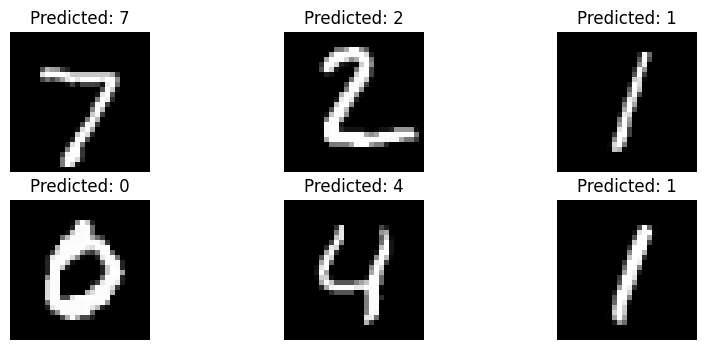

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()

# Pass images through the model to get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
fig = plt.figure(figsize=(10, 4))
for idx in range(6):
    ax = fig.add_subplot(2, 3, idx + 1)
    img = images[idx].numpy().squeeze()  # Squeeze to remove unnecessary dimensions
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'Predicted: {predicted[idx].item()}')
    ax.axis('off')  # Turn off axis labels
plt.show()

Changing Learning Rate